In [1]:
# load libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
import scipy.stats as st
import numpy as np

In [2]:
# load dataset
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


[Text(0,0.5,'Tip'), Text(0.5,0,'Total bill'), Text(0.5,1,'Tip by total bill')]

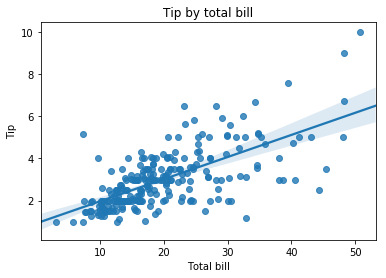

In [3]:
# plot total bill vs tip
ax = sns.regplot(data['total_bill'], data['tip'])
ax.set(title = 'Tip by total bill', xlabel = 'Total bill', ylabel = 'Tip')

In [4]:
# build model (using statsmodels)
model = smf.ols(formula = 'tip ~ total_bill', data = data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 28 Sep 2018   Prob (F-statistic):           6.69e-34
Time:                        06:32:40   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

In [5]:
# print coefficients
print(results.params)

Intercept     0.920270
total_bill    0.105025
dtype: float64


In [6]:
# build model (using sklearn)
model = linear_model.LinearRegression()
predicted = model.fit(X = data['total_bill'], y = data['tip'])

ValueError: Expected 2D array, got 1D array instead:
array=[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.51 24.52 20.76 31.71
 10.59 10.63 50.81 15.81  7.25 31.85 16.82 32.9  17.89 14.48  9.6  34.63
 34.65 23.33 45.35 23.17 40.55 20.69 20.9  30.46 18.15 23.1  15.69 19.81
 28.44 15.48 16.58  7.56 10.34 43.11 13.   13.51 18.71 12.74 13.   16.4
 20.53 16.47 26.59 38.73 24.27 12.76 30.06 25.89 48.33 13.27 28.17 12.9
 28.15 11.59  7.74 30.14 12.16 13.42  8.58 15.98 13.42 16.27 10.09 20.45
 13.28 22.12 24.01 15.69 11.61 10.77 15.53 10.07 12.6  32.83 35.83 29.03
 27.18 22.67 17.82 18.78].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
# X must be a 2D array
# reshape data and build model (using sklearn)
print(data['total_bill'].values.reshape(-1, 1))
predicted = model.fit(X = data['total_bill'].values.reshape(-1, 1), y = data['tip'])

[[16.99]
 [10.34]
 [21.01]
 [23.68]
 [24.59]
 [25.29]
 [ 8.77]
 [26.88]
 [15.04]
 [14.78]
 [10.27]
 [35.26]
 [15.42]
 [18.43]
 [14.83]
 [21.58]
 [10.33]
 [16.29]
 [16.97]
 [20.65]
 [17.92]
 [20.29]
 [15.77]
 [39.42]
 [19.82]
 [17.81]
 [13.37]
 [12.69]
 [21.7 ]
 [19.65]
 [ 9.55]
 [18.35]
 [15.06]
 [20.69]
 [17.78]
 [24.06]
 [16.31]
 [16.93]
 [18.69]
 [31.27]
 [16.04]
 [17.46]
 [13.94]
 [ 9.68]
 [30.4 ]
 [18.29]
 [22.23]
 [32.4 ]
 [28.55]
 [18.04]
 [12.54]
 [10.29]
 [34.81]
 [ 9.94]
 [25.56]
 [19.49]
 [38.01]
 [26.41]
 [11.24]
 [48.27]
 [20.29]
 [13.81]
 [11.02]
 [18.29]
 [17.59]
 [20.08]
 [16.45]
 [ 3.07]
 [20.23]
 [15.01]
 [12.02]
 [17.07]
 [26.86]
 [25.28]
 [14.73]
 [10.51]
 [17.92]
 [27.2 ]
 [22.76]
 [17.29]
 [19.44]
 [16.66]
 [10.07]
 [32.68]
 [15.98]
 [34.83]
 [13.03]
 [18.28]
 [24.71]
 [21.16]
 [28.97]
 [22.49]
 [ 5.75]
 [16.32]
 [22.75]
 [40.17]
 [27.28]
 [12.03]
 [21.01]
 [12.46]
 [11.35]
 [15.38]
 [44.3 ]
 [22.42]
 [20.92]
 [15.36]
 [20.49]
 [25.21]
 [18.24]
 [14.31]
 [14.  ]
 

In [8]:
# print coefficients
print(predicted.coef_)
print(predicted.intercept_)

[0.10502452]
0.9202696135546731


In [9]:
# build model (using scipy)
model = st.linregress(data['total_bill'], data['tip'])
print(model)

LinregressResult(slope=0.1050245173843534, intercept=0.9202696135546726, rvalue=0.6757341092113641, pvalue=6.692470646864404e-34, stderr=0.007364789848762602)


In [10]:
# validate coefficient
coef = (np.corrcoef(data[['total_bill', 'tip']].transpose())[0,1] * np.std(data['tip'])) / np.std(data['total_bill'])
print(coef)

0.1050245173843534


In [11]:
# validate intercept
intercept = data['tip'].mean() - coef * data['total_bill'].mean()
print(intercept)

0.9202696135546726


In [12]:
# validate p-value of coefficient
(1 - st.t.cdf(14.260, 242)) * 2

0.0

[Text(0,0.5,'Residuals'), Text(0.5,0,'Total bill')]

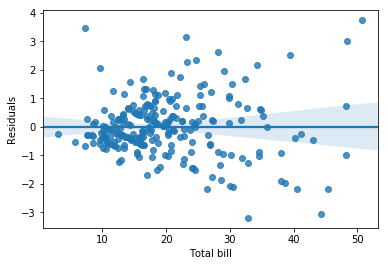

In [13]:
# plot residuals
ax = sns.regplot(data['total_bill'], results.resid)
ax.set(xlabel = 'Total bill', ylabel = 'Residuals')

C:\Users\Gonzalo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


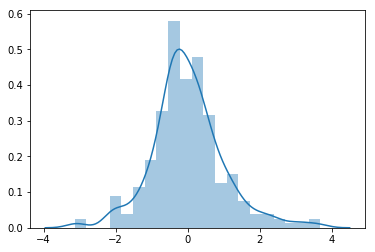

In [14]:
# plot distribution of residuals
sns.distplot(st.zscore(results.resid))

In [15]:
# EXERCISE 1
# build model to predict passenger's fares from their ages
data = sns.load_dataset("titanic")
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


[Text(0,0.5,'Fare'), Text(0.5,0,'Age'), Text(0.5,1,'Fare by age')]

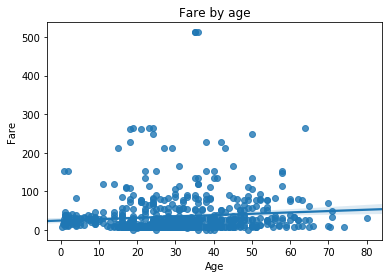

In [16]:
# plot age vs fare
ax = sns.regplot(data['age'], data['fare'])
ax.set(title = 'Fare by age', xlabel = 'Age', ylabel = 'Fare')

In [17]:
# build model (using statsmodels)
model = smf.ols(formula = 'fare ~ age', data = data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.632
Date:                Fri, 28 Sep 2018   Prob (F-statistic):             0.0102
Time:                        06:33:12   Log-Likelihood:                -3843.0
No. Observations:                 714   AIC:                             7690.
Df Residuals:                     712   BIC:                             7699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3009      4.492      5.410      0.0

In [18]:
# build model (using sklearn)
model = linear_model.LinearRegression()
predicted = model.fit(X = data['age'].values.reshape(-1, 1), y = data['fare'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
# data contains missing values
# drop missing values and build model (using sklearn)
data.dropna(subset = ['age', 'fare'], inplace = True)
model = linear_model.LinearRegression()
predicted = model.fit(X = data['age'].values.reshape(-1, 1), y = data['fare'])
print(predicted.coef_)
print(predicted.intercept_)

[0.34996368]
24.300901449288652


In [20]:
# build model (using scipy)
model = st.linregress(data['age'], data['fare'])
print(model)

LinregressResult(slope=0.34996368174402304, intercept=24.300901449288652, rvalue=0.09606669176903888, pvalue=0.010216277504447055, stderr=0.13589291969825207)


In [21]:
# EXERCISE 2
# validate linear regression assumptions by plotting residuals

[Text(0,0.5,'Residuals'), Text(0.5,0,'Age')]

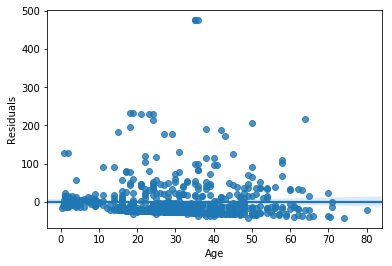

In [22]:
# plot residuals
ax = sns.regplot(data['age'], results.resid)
ax.set(xlabel = 'Age', ylabel = 'Residuals')

C:\Users\Gonzalo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


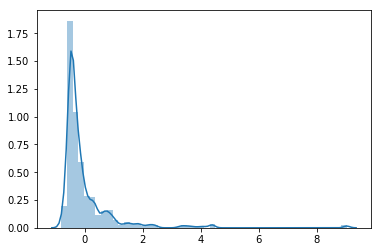

In [23]:
# plot distribution of residuals
sns.distplot(st.zscore(results.resid))